In [1]:
import tensorflow as tf

In [2]:
resnet_notop=tf.keras.applications.resnet50.ResNet50(include_top=False,pooling='avg')
for layers in resnet_notop.layers:
    layers.trainable=False

In [3]:
output_layer=tf.keras.layers.Dense(120,activation='softmax')(resnet_notop.output)

In [4]:
mymodel=tf.keras.Model(inputs=resnet_notop.input,outputs=output_layer)

In [5]:
mymodel.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
%%time
training='dogbreed'
validation='D:\\2021_tensorflow\\cats_n_dogs\\validation'
epochs=2

Wall time: 0 ns


In [7]:
%%time
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
        validation_split=0.25
    )

training_datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=32,subset='training'
)
validation_datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=32,subset='validation'
)
r = mymodel.fit_generator(
    training_datagen_flow_object, epochs=epochs,validation_data=validation_datagen_flow_object
)

Found 15480 images belonging to 120 classes.
Found 5100 images belonging to 120 classes.


C:\Users\AbhijitShingote\.conda\envs\tf2.6_092021\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
484/484 [==============================] - 157s 317ms/step - loss: 1.4632 - accuracy: 0.6134 - val_loss: 0.9237 - val_accuracy: 0.7220
Epoch 2/2
484/484 [==============================] - 152s 313ms/step - loss: 0.6491 - accuracy: 0.8064 - val_loss: 0.8709 - val_accuracy: 0.7504
Wall time: 5min 10s


In [8]:
mymodel.evaluate(validation_datagen_flow_object)

160/160 [==============================] - 38s 234ms/step - loss: 0.8709 - accuracy: 0.7504


[0.8708720207214355, 0.7503921389579773]

## Fine Tuning

In [9]:
resnet_notop.trainable=True
for layers in resnet_notop.layers[:-40]:
    layers.trainable=False
for layers in mymodel.layers:
    print(layers.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [10]:
mymodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                loss='categorical_crossentropy',metrics=['accuracy'])

r = mymodel.fit_generator(
    training_datagen_flow_object, epochs=epochs,validation_data=validation_datagen_flow_object
)

Epoch 1/2
484/484 [==============================] - 211s 428ms/step - loss: 0.5540 - accuracy: 0.8331 - val_loss: 0.9982 - val_accuracy: 0.7310
Epoch 2/2
484/484 [==============================] - 207s 428ms/step - loss: 0.1557 - accuracy: 0.9599 - val_loss: 1.0244 - val_accuracy: 0.7398


In [11]:
mymodel.evaluate(validation_datagen_flow_object)

160/160 [==============================] - 38s 235ms/step - loss: 1.0244 - accuracy: 0.7398


[1.0244086980819702, 0.7398039102554321]

In [12]:
import glob
import random

paths=glob.glob("dogbreed/*/*")

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def check_pred(img_path):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    preds = mymodel.predict(x)

    class_dict={value:key for key,value in training_datagen_flow_object.class_indices.items()}
    print('Predicted:', class_dict[np.argmax(preds)])

dogbreed\n02098413-Lhasa\n02098413_4115.jpg
Predicted: n02098413-Lhasa


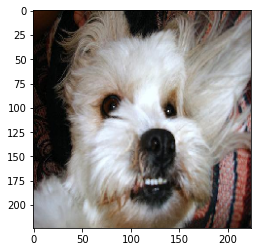

In [14]:
path=random.choice(paths)
check_pred(path)

dogbreed_internet_images_test/standard_schnauzer-1.jpg
Predicted: n02097047-miniature_schnauzer


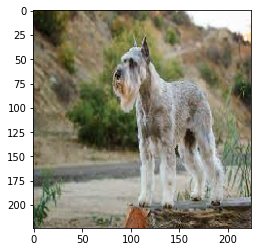

In [15]:
check_pred('dogbreed_internet_images_test/standard_schnauzer-1.jpg')

dogbreed_internet_images_test/standard_schnauzer-2.jpg
Predicted: n02097209-standard_schnauzer


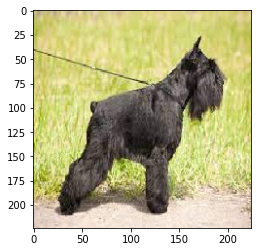

In [16]:
check_pred('dogbreed_internet_images_test/standard_schnauzer-2.jpg')

dogbreed_internet_images_test/toy_poodle-1.jpg
Predicted: n02113624-toy_poodle


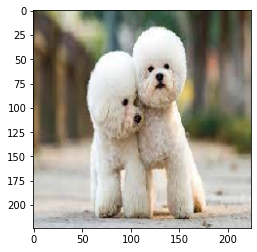

In [17]:
check_pred('dogbreed_internet_images_test/toy_poodle-1.jpg')

dogbreed_internet_images_test/toy_poodle-2.jpg
Predicted: n02102480-Sussex_spaniel


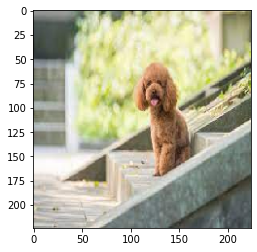

In [18]:
check_pred('dogbreed_internet_images_test/toy_poodle-2.jpg')